In [10]:
from tensorflow.keras.models import load_model
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path2 = '../Data/features_30_sec.csv'
df = pd.read_csv(path2)
df.head(1)
df = df.drop('filename',axis=1)
df.head(1)
labels = df['label']
features = df.drop('label',axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize a scaler object
scaler = StandardScaler()

# Fit the scaler on the training features and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Reshape the features to a 3D array [samples, timesteps, features]
# Assuming your features have shape (num_samples, num_features)
num_timesteps = 1  # Adjust the number of timesteps based on your requirements
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], num_timesteps, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], num_timesteps, X_test_scaled.shape[1]))

In [4]:
# Initialize a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the label encoder on the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Perform the same label encoding on the testing labels
y_test_encoded = label_encoder.transform(y_test)

In [5]:
model1 = load_model('rnn_model1.h5')
model2 = load_model('rnn_model2_epochs600_batch16.h5')
model3 = load_model('rnn_model2_epochs600_batch32.h5')
model4 = load_model('rnn_model3_epochs600_batch32_dropout.h5')

In [18]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 1, 128)            95744     
                                                                 
 dropout_6 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_8 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dropout_7 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [19]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model4.predict(X_test_reshaped)  # Make predictions on the scaled test data
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_encoded, y_pred_labels)  # Calculate accuracy
report = classification_report(y_test_encoded, y_pred_labels)  # Generate a detailed classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

7/7 [==============================] - 2s 3ms/step
Accuracy: 0.705
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.92      0.92      0.92        13
           2       0.78      0.67      0.72        27
           3       0.43      0.48      0.45        21
           4       0.71      0.80      0.75        15
           5       0.90      0.86      0.88        22
           6       0.82      0.92      0.87        25
           7       0.62      0.77      0.69        13
           8       0.69      0.48      0.56        23
           9       0.45      0.43      0.44        21

    accuracy                           0.70       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.71      0.70      0.70       200



In [8]:
path1 = '../Data/images_original/'
subfolders = os.listdir(path1)
subfolders.remove('.DS_Store')

7/7 [==============================] - 0s 4ms/step


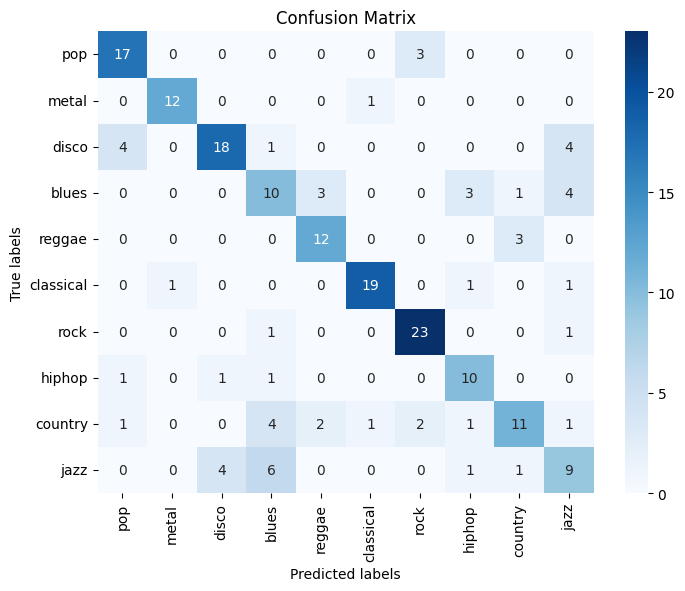

In [20]:
# Make predictions using the loaded model
predictions = model4.predict(X_test_reshaped)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=subfolders, yticklabels=subfolders)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()